Michael Crist
mcrist6
ISYE6740
Project

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import validation_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

    First, we clean the data to remove missing values and eliminate unecessary features.  For the purpose of this course, we will remove the categorical data attributes ('key' and 'mode').  The reason for this is because most (if not all) of the models taught in this course are for numerical data.  Working with numerical data will allow for better exploration of the models learned in this course, even if we might be able to obtain better model performance by including the two categorical variables.

In [2]:
# import data
df = pd.read_csv('music_genre.csv')

# remove datapoints with missing values
df = df.dropna(axis=0, how='any')
df = df[df.tempo != '?']
df = df[df.duration_ms != -1]

# convert "tempo" to float
df['tempo'] = df['tempo'].astype('float')

# remove unecessary features
df = df.drop(columns=['obtained_date', 'instance_id', 'key', 'mode', 'artist_name', 'track_name'])

# normalize data so that all features are in range [0,1]
df_x = df.loc[:, df.columns != 'music_genre']
df_norm = (df_x - df_x.min()) / (df_x.max() - df_x.min())
df_norm['music_genre'] = df['music_genre']
df = df_norm.copy()

# reset index
df = df.reset_index(drop=True)

    The original dataset was 50005 x 18.  After removing missing values and dropping unecessary features, the cleaned dataset is 40560 x 12.  There are 11 features and 1 target column.  Next, I will provide summary statistics to provide an overview interpretation of the numerical data.

In [3]:
# obtain summary statistics for the dataset
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000
mean,0.447239,0.307203,0.538448,0.051306,0.600614,0.182332,0.185948,0.746596,0.077675,0.460001,0.460606
std,0.157026,0.342477,0.192845,0.024567,0.264975,0.327018,0.163078,0.121179,0.110364,0.164865,0.248933
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.343434,0.020080,0.412781,0.039034,0.432984,0.000000,0.088183,0.712798,0.015005,0.325640,0.261089
50%,0.454545,0.144578,0.549870,0.047301,0.644363,0.000158,0.117466,0.783008,0.028922,0.459361,0.452621
75%,0.565657,0.552209,0.677245,0.058060,0.817673,0.152610,0.236618,0.824414,0.083179,0.570094,0.653226
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


    Next, I will perform PCA on the data to visualize the data in 2 dimensions.  Each label (genre) is color coded.

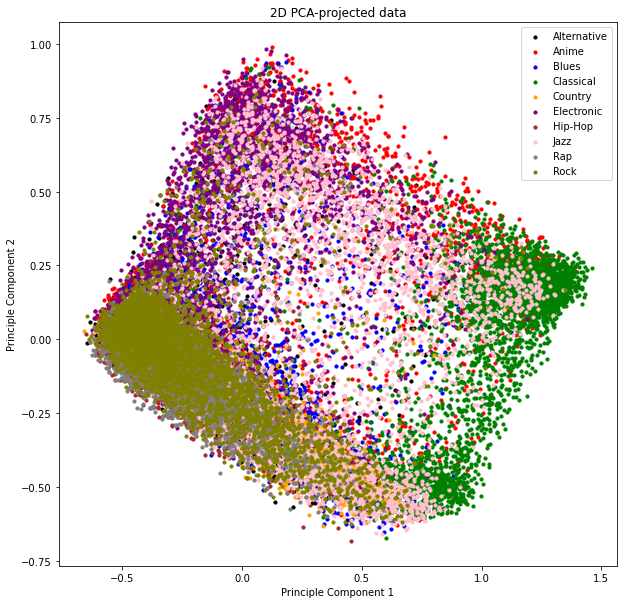

In [4]:
# convert data into numpy matrix
data = np.asarray(df)

# split data into feature data and label data
xdata = data[:,:-1]
y = data[:,-1]

# perform PCA on the feature data
pca = PCA(n_components=2)
xPCA = pca.fit_transform(xdata)

# plot PCA-reduced data, colored by genre
colors = ['black', 'red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive']
labels = list(np.unique(y))
cdict = {i:k for i, k in zip(labels, colors)}

plt.rcParams["figure.figsize"] = (10,10)
for label in labels:
    ix = np.where(y == label)
    plt.scatter(xPCA[ix,0], xPCA[ix,1], c = cdict[label], label=label, s=10)

plt.legend()
plt.title("2D PCA-projected data")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

    The plot above displays the data in a 2D PCA projection.  It is clear that there are trends in the data, dependent upon the genre.  The next step is to divide the data into training and test sets, then build and evaluate a variety of models including Naive Bayes, Logistic Regression, KNN, linear SVM, kernel SVM, and neural networks.  This serves as simply an initial pass at classifying the data, to get a baseline before we further improve our models.

In [5]:
# divide data into 80% training and 20% test
x_train, x_test, y_train, y_test = train_test_split(xdata, y, test_size=0.2, random_state=10)

# create Naive Bayes classifier and get prediction for test set
bayes_clf = GaussianNB().fit(x_train, y_train)
bayes_pred = bayes_clf.predict(x_test)

# create logistic regression classifier and get prediction for test set
LR_clf = LogisticRegression(random_state=10).fit(x_train, y_train)
LR_pred = LR_clf.predict(x_test)

# create KNN classifier and get prediction for test set
KNN_clf = KNeighborsClassifier().fit(x_train, y_train)
KNN_pred = KNN_clf.predict(x_test)

# create linear SVM classifier and get prediction for test set
SVM_clf = SVC(kernel='linear', max_iter=50, random_state=10).fit(x_train, y_train)
SVM_pred = SVM_clf.predict(x_test)

# create polynomial kernel SVM classifier and get prediction for test set
kSVM_clf = SVC(kernel='poly', max_iter=50, random_state=10).fit(x_train, y_train)
kSVM_pred = kSVM_clf.predict(x_test)

# create neural net classifier and get prediction for test set
NN_clf = MLPClassifier(hidden_layer_sizes=(20,10), max_iter=50, random_state=10).fit(x_train, y_train)
NN_pred = NN_clf.predict(x_test)

# create Pandas df containing the actual labels in the test set, and all of the predictions
df_pred = pd.DataFrame(list(zip(y_test, bayes_pred, LR_pred, KNN_pred, SVM_pred, kSVM_pred, NN_pred)), 
                 columns=['Actual_Label', 'Bayes_Pred', 'LogReg_Pred', 'KNN_Pred', 'SVM_Pred', 'kSVM_Pred', "NN_Pred"])

# create 'Match' columns populated with a 1 for correct prediction and 0 for incorrect prediction
df_pred['Bayes_Match'] = np.where(df_pred['Bayes_Pred'] == df_pred['Actual_Label'], 1, 0)
df_pred['LogReg_Match'] = np.where(df_pred['LogReg_Pred'] == df_pred['Actual_Label'], 1, 0)
df_pred['KNN_Match'] = np.where(df_pred['KNN_Pred'] == df_pred['Actual_Label'], 1, 0)
df_pred['SVM_Match'] = np.where(df_pred['SVM_Pred'] == df_pred['Actual_Label'], 1, 0)
df_pred['kSVM_Match'] = np.where(df_pred['kSVM_Pred'] == df_pred['Actual_Label'], 1, 0)
df_pred['NN_Match'] = np.where(df_pred['NN_Pred'] == df_pred['Actual_Label'], 1, 0)

# calculate misclassification rate for each algorithm
n = len(df_pred)
misrateBayes = 1 - df_pred['Bayes_Match'].value_counts()[1] / n
misrateLR = 1 - df_pred['LogReg_Match'].value_counts()[1] / n
misrateKNN = 1 - df_pred['KNN_Match'].value_counts()[1] / n
misrateSVM = 1 - df_pred['SVM_Match'].value_counts()[1] / n
misratekSVM = 1 - df_pred['kSVM_Match'].value_counts()[1] / n
misrateNN = 1 - df_pred['NN_Match'].value_counts()[1] / n
print(f'Naive Bayes misclassification rate on test set: {misrateBayes}')
print(f'Logistic Regression misclassification rate on test set: {misrateLR}')
print(f'KNN misclassification rate on test set: {misrateKNN}')
print(f'SVM misclassification rate on test set: {misrateSVM}')
print(f'Polynomial Kernel SVM misclassification rate on test set: {misratekSVM}')
print(f'Neural Network misclassification rate on test set: {misrateNN}')

Naive Bayes misclassification rate on test set: 0.5727317554240632
Logistic Regression misclassification rate on test set: 0.47694773175542404
KNN misclassification rate on test set: 0.5322978303747534
SVM misclassification rate on test set: 0.6915680473372781
Polynomial Kernel SVM misclassification rate on test set: 0.7597386587771203
Neural Network misclassification rate on test set: 0.4571005917159763


    As can be seen above, some of the initial model attempts perform better than others.  The best performing initial models are neural network and logistic regression, with misclassification rates of 46.1% and 47.7%, respectively.  Next, we will investigate whether there are outliers in the data that are skewing the models.

<AxesSubplot:xlabel='variable', ylabel='value'>

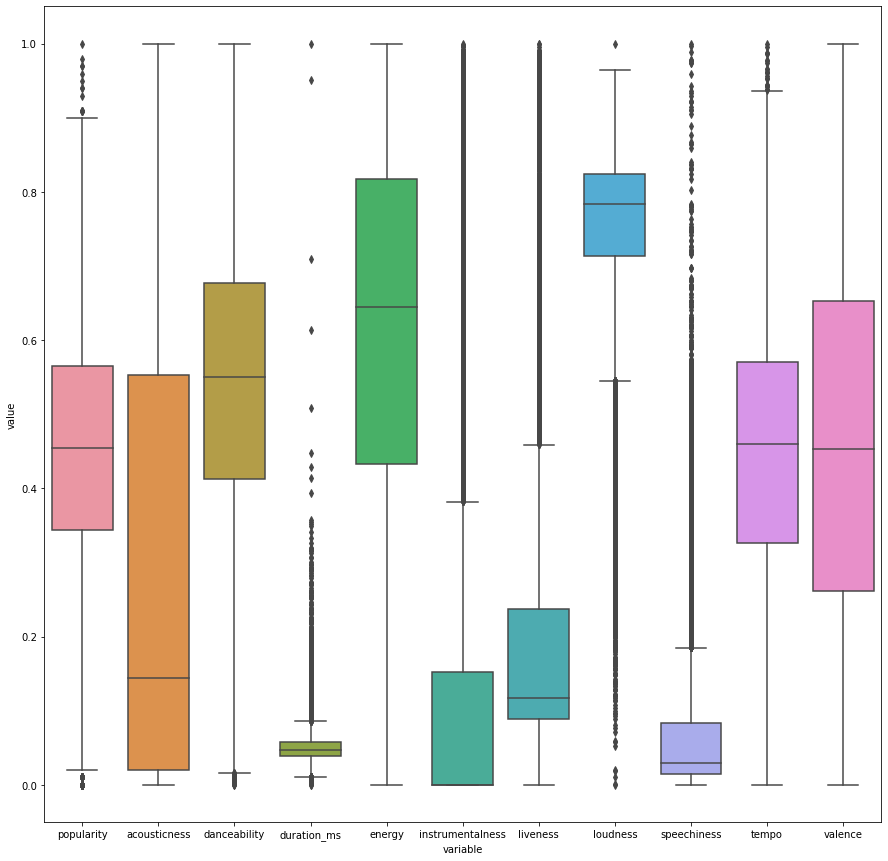

In [6]:
# get dataframe of only the feature data
df_x = df.loc[:, df.columns != 'music_genre']

# melt df to allow us to get boxplots of all variables on a single plot
df_melted = pd.melt(df_x)

# plot boxplots of all variables to visualize outliers
plt.rcParams["figure.figsize"] = (15,15)
sns.boxplot(x='variable', y='value', data=df_melted)

    As can be seen in the boxplots above, it appears that we may have quite a few outliers in a few of the variables, namely: duration, instrumentalness, liveness, loudness, and speechiness.  To address this, we will detect and remove outliers from the dataset.  However, we cannot remove outliers based upon whether a specific feature value is an outlier based upon the distribution of that feature alone.  We must consider whether apparent outlying feature values might not be considered outliers dependent upon the value of the label or correlation with other features.  As such, we will use sklearn's IsolationForest function to detect outliers.

In [7]:
# use sklearn isolation forest to detect presence of outliers
outliers = IsolationForest(contamination='auto', random_state=10).fit_predict(xdata)

# return count of outliers - outliers are labeled as -1, whereas inliers are labeled as 1
print(f'# outliers detected / total # datapoints: {np.unique(outliers, return_counts=True)[1][0]} / {len(xdata)}')

# outliers detected / total # datapoints: 6879 / 40560


    As can be seen in the output above, we detected 6879 outliers out of the total 40560 datapoints.  Next, we will remove these outliers from the dataset, and rerun our models.

In [8]:
# create new dataframe with outliers removed
df_noOutlier = df.copy()
df_noOutlier['outlier'] = outliers
df_noOutlier = df_noOutlier[df_noOutlier.outlier != -1]
df_noOutlier = df_noOutlier.drop(columns=['outlier'])

# convert data into numpy matrix
data = np.asarray(df_noOutlier)

# split data into feature data and label data
xdata = data[:,:-1]
y = data[:,-1]

# divide data into 80% training and 20% test
x_train, x_test, y_train, y_test = train_test_split(xdata, y, test_size=0.2, random_state=10)

# create Naive Bayes classifier and get prediction for test set
bayes_clf = GaussianNB().fit(x_train, y_train)
bayes_pred = bayes_clf.predict(x_test)

# create logistic regression classifier and get prediction for test set
LR_clf = LogisticRegression(random_state=10).fit(x_train, y_train)
LR_pred = LR_clf.predict(x_test)

# create KNN classifier and get prediction for test set
KNN_clf = KNeighborsClassifier().fit(x_train, y_train)
KNN_pred = KNN_clf.predict(x_test)

# create linear SVM classifier and get prediction for test set
SVM_clf = SVC(kernel='linear', max_iter=100, random_state=10).fit(x_train, y_train)
SVM_pred = SVM_clf.predict(x_test)

# create polynomial kernel SVM classifier and get prediction for test set
kSVM_clf = SVC(kernel='poly', max_iter=100, random_state=10).fit(x_train, y_train)
kSVM_pred = kSVM_clf.predict(x_test)

# create neural net classifier and get prediction for test set
NN_clf = MLPClassifier(hidden_layer_sizes=(20,10), max_iter=100, random_state=10).fit(x_train, y_train)
NN_pred = NN_clf.predict(x_test)

# create Pandas df containing the actual labels in the test set, and all of the predictions
df_pred = pd.DataFrame(list(zip(y_test, bayes_pred, LR_pred, KNN_pred, SVM_pred, kSVM_pred, NN_pred)), 
                 columns=['Actual_Label', 'Bayes_Pred', 'LogReg_Pred', 'KNN_Pred', 'SVM_Pred', 'kSVM_Pred', "NN_Pred"])

# create 'Match' columns populated with a 1 for correct prediction and 0 for incorrect prediction
df_pred['Bayes_Match'] = np.where(df_pred['Bayes_Pred'] == df_pred['Actual_Label'], 1, 0)
df_pred['LogReg_Match'] = np.where(df_pred['LogReg_Pred'] == df_pred['Actual_Label'], 1, 0)
df_pred['KNN_Match'] = np.where(df_pred['KNN_Pred'] == df_pred['Actual_Label'], 1, 0)
df_pred['SVM_Match'] = np.where(df_pred['SVM_Pred'] == df_pred['Actual_Label'], 1, 0)
df_pred['kSVM_Match'] = np.where(df_pred['kSVM_Pred'] == df_pred['Actual_Label'], 1, 0)
df_pred['NN_Match'] = np.where(df_pred['NN_Pred'] == df_pred['Actual_Label'], 1, 0)

# calculate misclassification rate for each algorithm
n = len(df_pred)
misrateBayes = 1 - df_pred['Bayes_Match'].value_counts()[1] / n
misrateLR = 1 - df_pred['LogReg_Match'].value_counts()[1] / n
misrateKNN = 1 - df_pred['KNN_Match'].value_counts()[1] / n
misrateSVM = 1 - df_pred['SVM_Match'].value_counts()[1] / n
misratekSVM = 1 - df_pred['kSVM_Match'].value_counts()[1] / n
misrateNN = 1 - df_pred['NN_Match'].value_counts()[1] / n
print(f'Naive Bayes misclassification rate on test set: {misrateBayes}')
print(f'Logistic Regression misclassification rate on test set: {misrateLR}')
print(f'KNN misclassification rate on test set: {misrateKNN}')
print(f'SVM misclassification rate on test set: {misrateSVM}')
print(f'Polynomial Kernel SVM misclassification rate on test set: {misratekSVM}')
print(f'Neural Network misclassification rate on test set: {misrateNN}')

Naive Bayes misclassification rate on test set: 0.5996734451536292
Logistic Regression misclassification rate on test set: 0.5134332789075255
KNN misclassification rate on test set: 0.5742912275493544
SVM misclassification rate on test set: 0.7109989609618524
Polynomial Kernel SVM misclassification rate on test set: 0.7749740240463114
Neural Network misclassification rate on test set: 0.4880510613032507


    Unfortunately, this method of outlier removal did not improve our models.  Next, we will take a different approach to outlier removal.  This time, we will calculate the Q1 quartile, Q3 quartile, and inter-quantile range (IQR) for each feature, for each label.  The IQR is the difference between Q3 and Q1.  Outlying datapoints will be considered any datapoint that contains a feature value greater than upper bound or less than the lower bound, where the upper bound is Q3 + 1.5*IQR, and the lower bound is Q1 - 1.5*IQR.

In [9]:
# initialize empty list to contain outlier label for each datapoint
out_list = []

# iterate over each music genre label
for label in df['music_genre'].unique():
    
    # create temporary df containing datapoints corresponding only to one label per iteration
    df_temp = df.copy()
    df_temp = df_temp[df_temp.music_genre == f'{label}']
    df_x_temp = df_temp.loc[:, df_temp.columns != 'music_genre']
    
    # get Q1/Q3 quantiles and IQR for the normalized data
    Q3 = df_x_temp.quantile(.75)
    Q1 = df_x_temp.quantile(.25)
    IQR = Q3 - Q1
    
    # set upper and lower bounds for the data
    upper_bound = Q3 + (1.5*IQR)
    lower_bound = Q1 - (1.5*IQR)
    
    # append outlier list with outlier label (True/False)
    upper = pd.isnull(df_x_temp[df_x_temp <= upper_bound]).any(1)
    lower = pd.isnull(df_x_temp[df_x_temp >= lower_bound]).any(1)
    outliers_temp = (upper | lower).tolist()
    out_list.append(outliers_temp)

# reshape outlier list to single list rather than list of lists
out_list = sum(out_list, [])

# create new df with outliers removed
df_noOutlier = df.copy()
df_noOutlier['outlier'] = out_list
df_noOutlier = df_noOutlier[df_noOutlier.outlier == False]
df_noOutlier = df_noOutlier.drop(columns=['outlier'])
df_noOutlier = df_noOutlier.reset_index(drop=True)

In [10]:
# convert data into numpy matrix
data = np.asarray(df_noOutlier)

# split data into feature data and label data
xdata = data[:,:-1]
y = data[:,-1]

# divide data into 80% training and 20% test
x_train, x_test, y_train, y_test = train_test_split(xdata, y, test_size=0.2, random_state=10)

# create Naive Bayes classifier and get prediction for test set
bayes_clf = GaussianNB().fit(x_train, y_train)
bayes_pred = bayes_clf.predict(x_test)

# create logistic regression classifier and get prediction for test set
LR_clf = LogisticRegression(random_state=10).fit(x_train, y_train)
LR_pred = LR_clf.predict(x_test)

# create KNN classifier and get prediction for test set
KNN_clf = KNeighborsClassifier().fit(x_train, y_train)
KNN_pred = KNN_clf.predict(x_test)

# create linear SVM classifier and get prediction for test set
SVM_clf = SVC(kernel='linear', max_iter=100, random_state=10).fit(x_train, y_train)
SVM_pred = SVM_clf.predict(x_test)

# create polynomial kernel SVM classifier and get prediction for test set
kSVM_clf = SVC(kernel='poly', max_iter=100, random_state=10).fit(x_train, y_train)
kSVM_pred = kSVM_clf.predict(x_test)

# create neural net classifier and get prediction for test set
NN_clf = MLPClassifier(hidden_layer_sizes=(20,10), random_state=10).fit(x_train, y_train)
NN_pred = NN_clf.predict(x_test)

# create Pandas df containing the actual labels in the test set, and all of the predictions
df_pred = pd.DataFrame(list(zip(y_test, bayes_pred, LR_pred, KNN_pred, SVM_pred, kSVM_pred, NN_pred)), 
                 columns=['Actual_Label', 'Bayes_Pred', 'LogReg_Pred', 'KNN_Pred', 'SVM_Pred', 'kSVM_Pred', "NN_Pred"])

# create 'Match' columns populated with a 1 for correct prediction and 0 for incorrect prediction
df_pred['Bayes_Match'] = np.where(df_pred['Bayes_Pred'] == df_pred['Actual_Label'], 1, 0)
df_pred['LogReg_Match'] = np.where(df_pred['LogReg_Pred'] == df_pred['Actual_Label'], 1, 0)
df_pred['KNN_Match'] = np.where(df_pred['KNN_Pred'] == df_pred['Actual_Label'], 1, 0)
df_pred['SVM_Match'] = np.where(df_pred['SVM_Pred'] == df_pred['Actual_Label'], 1, 0)
df_pred['kSVM_Match'] = np.where(df_pred['kSVM_Pred'] == df_pred['Actual_Label'], 1, 0)
df_pred['NN_Match'] = np.where(df_pred['NN_Pred'] == df_pred['Actual_Label'], 1, 0)

# calculate misclassification rate for each algorithm
n = len(df_pred)
misrateBayes = 1 - df_pred['Bayes_Match'].value_counts()[1] / n
misrateLR = 1 - df_pred['LogReg_Match'].value_counts()[1] / n
misrateKNN = 1 - df_pred['KNN_Match'].value_counts()[1] / n
misrateSVM = 1 - df_pred['SVM_Match'].value_counts()[1] / n
misratekSVM = 1 - df_pred['kSVM_Match'].value_counts()[1] / n
misrateNN = 1 - df_pred['NN_Match'].value_counts()[1] / n
print(f'Naive Bayes misclassification rate on test set: {misrateBayes}')
print(f'Logistic Regression misclassification rate on test set: {misrateLR}')
print(f'KNN misclassification rate on test set: {misrateKNN}')
print(f'SVM misclassification rate on test set: {misrateSVM}')
print(f'Polynomial Kernel SVM misclassification rate on test set: {misratekSVM}')
print(f'Neural Network misclassification rate on test set: {misrateNN}')

Naive Bayes misclassification rate on test set: 0.4809423482091554
Logistic Regression misclassification rate on test set: 0.40145565983528064
KNN misclassification rate on test set: 0.4663857498563494
SVM misclassification rate on test set: 0.5408925493200536
Polynomial Kernel SVM misclassification rate on test set: 0.6665389772074315
Neural Network misclassification rate on test set: 0.3800038306837771


    As can be seen in the misclassification rates above, using IQR to classify outliers performed better than using the IsolationForest function to classify outliers.  So, we will continue forward using the dataset obtained by removing outliers using the IQR method.  The two models that performed best are logistic regression and neural network.  So, we will continue forward with only those two models.  First, let's get some more detailed metrics for the initial logistic regression and neural network models

In [11]:
# get detailed metrics for initial logistic regression and neural network models

print("\n***Logistic Regression Metrics***\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, LR_pred))
pscore = precision_score(y_test, LR_pred, average='macro')
print(f'Precision Score: {pscore}')
rscore = recall_score(y_test, LR_pred, average='macro')
print(f'Recall Score: {rscore}')
f1score = f1_score(y_test, LR_pred, average='macro')
print(f'F-1 Score: {f1score}')

print("\n***Neural Network Metrics***\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, NN_pred))
pscore = precision_score(y_test, NN_pred, average='macro')
print(f'Precision Score: {pscore}')
rscore = recall_score(y_test, NN_pred, average='macro')
print(f'Recall Score: {rscore}')
f1score = f1_score(y_test, NN_pred, average='macro')
print(f'F-1 Score: {f1score}')


***Logistic Regression Metrics***

Confusion Matrix:
[[186   0   4   0  88  19  19   6  18  79]
 [ 17 477  36  39  21  27   0  19   0   0]
 [ 20  90 293   0  39  19   0  42   0   8]
 [  0  15  11 407   1   0   0  15   0   0]
 [ 46   4  61   0 241  23   1  28   3  86]
 [ 33  55  26   0  19 330  14  28   6  11]
 [ 26   0   1   0  20   8 326   3 219  34]
 [  9  25  74  42  34  61   5 310   0  11]
 [ 21   0   0   0  11   2 211   0 217  64]
 [ 65   0   2   0  35   1   5   3   8 338]]
Precision Score: 0.5953967856584559
Recall Score: 0.6001620894659807
F-1 Score: 0.5948350820384005

***Neural Network Metrics***

Confusion Matrix:
[[185   4   6   0  65  19  20   2  26  92]
 [ 19 495  45  28  12  24   0  13   0   0]
 [ 19  75 304   1  32  22   0  48   0  10]
 [  0  18   7 407   0   0   0  17   0   0]
 [ 46   7  51   0 238   7   1  14   6 123]
 [ 29  41  25   0  15 353  14  35   6   4]
 [ 21   0   0   0   1   4 334   0 239  38]
 [  6  14  73  34  23  74   3 330   0  14]
 [ 16   0   0   0   4  

    Next, let's tune the logistic regression model by plotting cross validation scores versus select model parameters.  For logistic regression, we will tune the inverse of the regularization strength (1 / lambda).

In [12]:
# create range of inverse regularization strength (1/lambda) values to test in cross validation
lambda_range = np.linspace(1, 21, 20)

# get cross-validation score for 10-fold cross validation, evaluating different values of inverse regularization strength 
_, cv = validation_curve(LogisticRegression(), x_train, y_train, param_name="C", param_range=lambda_range, cv=3)

# get mean cross validation scores for each inverse regularization strength (1/lambda)
mean_cv = np.mean(cv, axis=1)

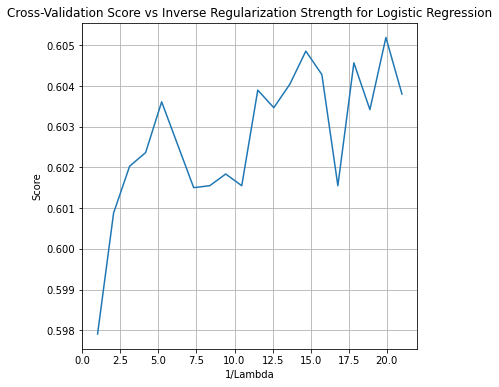

In [13]:
# Plot cross validation scores on y-axis with lambda on x-axis
plt.rcParams["figure.figsize"] = (6,6)
plt.plot(lambda_range, mean_cv)
 
# generate plot
plt.xlabel("1/Lambda")
plt.ylabel("Score")
plt.grid()
plt.title("Cross-Validation Score vs Inverse Regularization Strength for Logistic Regression")
plt.show()

    As can be seen by the plot of regularization strength versus cross validation score above, we should choose a regularization score of 2.0.  Next, we will tune the neural network by plotting cross-validation score for various configurations of hidden_layer_sizes.  Additionally, we will plot cross-validation score for each solver type (Newton, stochastic gradient descent, and an alternate stochastic gradient descent).

In [14]:
# create list of hidden layer configurations to evaluate
hidden_layers = [(20,10), (20,20), (30,15), (30,30), (50,50), (100,100), (100,)]

# get cross-validation score for 10-fold cross validation, evaluating different values of inverse regularization strength 
_, cv = validation_curve(MLPClassifier(max_iter=50), x_train, y_train, param_name="hidden_layer_sizes", 
                         param_range=hidden_layers, cv=3)

# get mean cross validation scores for each inverse regularization strength (1/lambda)
mean_cv = np.mean(cv, axis=1)

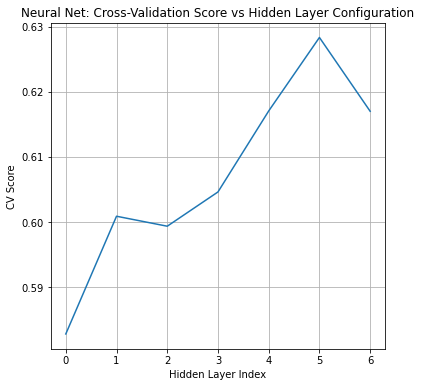

In [15]:
# Plot cross validation scores on y-axis with hidden_layers on x-axis
plt.rcParams["figure.figsize"] = (6,6)
plt.plot([0,1,2,3,4,5,6], mean_cv)
 
# generate plot
plt.xlabel("Hidden Layer Index")
plt.ylabel("CV Score")
plt.grid()
plt.title("Neural Net: Cross-Validation Score vs Hidden Layer Configuration")
plt.show()

In [16]:
# create list of hidden layer configurations to evaluate
solvers = ['lbfgs', 'sgd', 'adam']

# get cross-validation score for 3-fold cross validation, evaluating different values of inverse regularization strength 
_, cv = validation_curve(MLPClassifier(max_iter=50, hidden_layer_sizes=(100,100)), x_train, y_train, 
                         param_name="solver", 
                         param_range=solvers, cv=3)

# get mean cross validation scores for each inverse regularization strength (1/lambda)
mean_cv = np.mean(cv, axis=1)

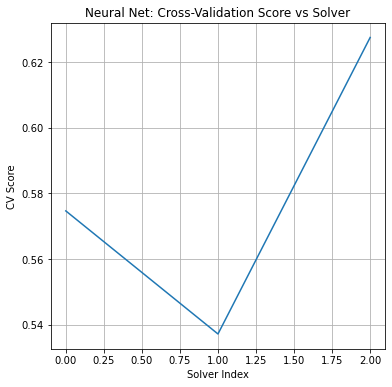

In [17]:
# Plot cross validation scores on y-axis with solvers on x-axis
plt.rcParams["figure.figsize"] = (6,6)
plt.plot([0,1,2], mean_cv)
 
# generate plot
plt.xlabel("Solver Index")
plt.ylabel("CV Score")
plt.grid()
plt.title("Neural Net: Cross-Validation Score vs Solver")
plt.show()

    As can be seen in the plot above, the neural network performs best with hidden_layer_sizes=(100,100).  This is not surprising, because this was the maximum number of neurons tested.  Generally, we would expect our neural network performance to improve as the number of neurons in each hidden layer increases, but it makes our model less efficient.  Additionally, the neural network performs best using the alternate stochastic gradient-based optimizer, which is the default value for the 'solver' parameter.  Next, we will recalculate misclassification rates using our new models with tuned hyper parameters.

In [18]:
# create logistic regression classifier and get prediction for test set
LR_clf = LogisticRegression(random_state=10, C=2).fit(x_train, y_train)
LR_pred = LR_clf.predict(x_test)

# create neural net classifier and get prediction for test set
NN_clf = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=100, random_state=10).fit(x_train, y_train)
NN_pred = NN_clf.predict(x_test)

# create Pandas df containing the actual labels in the test set, and all of the predictions
df_pred = pd.DataFrame(list(zip(y_test, LR_pred, NN_pred)), 
                 columns=['Actual_Label', 'LogReg_Pred', "NN_Pred"])

# create 'Match' columns populated with a 1 for correct prediction and 0 for incorrect prediction
df_pred['LogReg_Match'] = np.where(df_pred['LogReg_Pred'] == df_pred['Actual_Label'], 1, 0)
df_pred['NN_Match'] = np.where(df_pred['NN_Pred'] == df_pred['Actual_Label'], 1, 0)

# calculate misclassification rate for each algorithm
n = len(df_pred)
misrateLR = 1 - df_pred['LogReg_Match'].value_counts()[1] / n
misrateNN = 1 - df_pred['NN_Match'].value_counts()[1] / n
print(f'Logistic Regression misclassification rate on test set: {misrateLR}')
print(f'Neural Network misclassification rate on test set: {misrateNN}')

Logistic Regression misclassification rate on test set: 0.40145565983528064
Neural Network misclassification rate on test set: 0.3514652365447233


    At this point, the neural network is the best performing model.  Next, we will try AdaBoost, classification tree, and random forest classification models.  Use cross-validation for different alpha to tune classification tree.  Use OOB error plot to determine number of trees in random forest.  Consider gradient boosting for random forest

In [19]:
# create AdaBoost classifier and get prediction for test set
ada_clf = AdaBoostClassifier(random_state=10).fit(x_train, y_train)
ada_pred = ada_clf.predict(x_test)

# create tree classifier and get prediction for test set
DT_clf = DecisionTreeClassifier(random_state=10).fit(x_train, y_train)
DT_pred = DT_clf.predict(x_test)

# create neural net classifier and get prediction for test set
RF_clf = RandomForestClassifier(random_state=10, oob_score=True).fit(x_train, y_train)
RF_pred = RF_clf.predict(x_test)

# create Pandas df containing the actual labels in the test set, and all of the predictions
df_pred = pd.DataFrame(list(zip(y_test, ada_pred, DT_pred, RF_pred)), 
                 columns=['Actual_Label', 'Ada_Pred', 'DT_Pred', 'RF_Pred'])

# create 'Match' columns populated with a 1 for correct prediction and 0 for incorrect prediction
df_pred['Ada_Match'] = np.where(df_pred['Ada_Pred'] == df_pred['Actual_Label'], 1, 0)
df_pred['DT_Match'] = np.where(df_pred['DT_Pred'] == df_pred['Actual_Label'], 1, 0)
df_pred['RF_Match'] = np.where(df_pred['RF_Pred'] == df_pred['Actual_Label'], 1, 0)

# calculate misclassification rate for each algorithm
n = len(df_pred)
misrateAda = 1 - df_pred['Ada_Match'].value_counts()[1] / n
misrateDT = 1 - df_pred['DT_Match'].value_counts()[1] / n
misrateRF = 1 - df_pred['RF_Match'].value_counts()[1] / n
print(f'AdaBoost misclassification rate on test set: {misrateAda}')
print(f'Decision Tree misclassification rate on test set: {misrateDT}')
print(f'Random Forest misclassification rate on test set: {misrateRF}')

AdaBoost misclassification rate on test set: 0.5090978739705037
Decision Tree misclassification rate on test set: 0.4667688182340548
Random Forest misclassification rate on test set: 0.3752154759624593


    As can be seen in the output above, the initial models for both the decision tree and random forest classifiers performed pretty well.  Next, let's tune the model parameters for the decision tree and random forest models to see if we can improve.

In [20]:
# create range of max tree depth values to test in cross validation
depth = np.linspace(1, 20, 21).astype(int)

# get cross-validation score for 5-fold cross validation, evaluating different values of max_depth
_, cv = validation_curve(DecisionTreeClassifier(), x_train, y_train, param_name="max_depth", param_range=depth, cv=5)

# get mean cross validation scores for each inverse regularization strength (1/lambda)
mean_cv = np.mean(cv, axis=1)

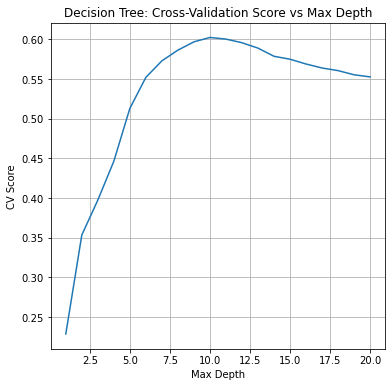

In [21]:
# Plot cross validation scores on y-axis with lambda on x-axis
plt.rcParams["figure.figsize"] = (6,6)
plt.plot(depth, mean_cv)
 
# generate plot
plt.xlabel("Max Depth")
plt.ylabel("CV Score")
plt.grid()
plt.title("Decision Tree: Cross-Validation Score vs Max Depth")
plt.show()

    As can be seen above, the cross validation score is optimized for the decision tree model when the max depth is set to 10.  Next, we will tune the random forest model by plotting the number of trees vs the OOB error.

In [1]:
# build array of number of trees to test between 0 and 1000
n_trees = np.linspace(1, 1000, 11).astype(int)

# create random forest model
RF_clf = RandomForestClassifier(random_state=10, oob_score=True)

# initialize empty list to contain OOB error value for each number of trees tested
oob = []

# iterate over number of trees to get OOB error
for i in n_trees:
    RF_clf.set_params(n_estimators=i)
    RF_clf.fit(x_train, y_train)
    oob.append(1-RF_clf.oob_score_)

# Plot cross validation scores on y-axis with lambda on x-axis
plt.rcParams["figure.figsize"] = (6,6)
plt.plot(n_trees, oob)
 
# generate plot
plt.xlabel("Number of Trees")
plt.ylabel("OOB Error")
plt.grid()
plt.title("Random Forest: OOB Error vs Number of Trees")
plt.show()

NameError: name 'np' is not defined

    As can be seen in the above plot, the out of bag error is minimized for n_trees=800.  So, we will re-run the Random Forest model using 800 trees.

In [23]:
# create tree classifier and get prediction for test set
DT_clf = DecisionTreeClassifier(random_state=10, max_depth=10).fit(x_train, y_train)
DT_pred = DT_clf.predict(x_test)

# create neural net classifier and get prediction for test set
RF_clf = RandomForestClassifier(random_state=10, oob_score=True, n_estimators=800).fit(x_train, y_train)
RF_pred = RF_clf.predict(x_test)

# create Pandas df containing the actual labels in the test set, and all of the predictions
df_pred = pd.DataFrame(list(zip(y_test, DT_pred, RF_pred)), 
                 columns=['Actual_Label', 'DT_Pred', 'RF_Pred'])

# create 'Match' columns populated with a 1 for correct prediction and 0 for incorrect prediction
df_pred['DT_Match'] = np.where(df_pred['DT_Pred'] == df_pred['Actual_Label'], 1, 0)
df_pred['RF_Match'] = np.where(df_pred['RF_Pred'] == df_pred['Actual_Label'], 1, 0)

# calculate misclassification rate for each algorithm
n = len(df_pred)
misrateDT = 1 - df_pred['DT_Match'].value_counts()[1] / n
misrateRF = 1 - df_pred['RF_Match'].value_counts()[1] / n
print(f'Decision Tree misclassification rate on test set: {misrateDT}')
print(f'Random Forest misclassification rate on test set: {misrateRF}')

Decision Tree misclassification rate on test set: 0.39762497605822644
Random Forest misclassification rate on test set: 0.36908638191917253


    The random forest model is the best performing model between random forest and decision tree.  Next, let's see if we can further tune the random forest model by optimizing the max_depth and min_samples_split hyperparameters.

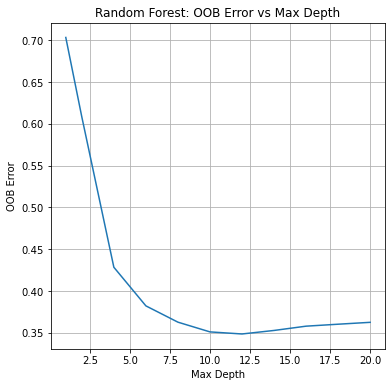

In [24]:
# build array of max_depth values from 1-20
depth = np.linspace(1, 20, 11).astype(int)

# create random forest model
RF_clf = RandomForestClassifier(random_state=10, oob_score=True, n_estimators=800)

# initialize empty list to contain OOB error value for each number of trees tested
oob = []

# iterate over number of trees to get OOB error
for i in depth:
    RF_clf.set_params(max_depth=i)
    RF_clf.fit(x_train, y_train)
    oob.append(1-RF_clf.oob_score_)

# Plot cross validation scores on y-axis with lambda on x-axis
plt.rcParams["figure.figsize"] = (6,6)
plt.plot(depth, oob)
 
# generate plot
plt.xlabel("Max Depth")
plt.ylabel("OOB Error")
plt.grid()
plt.title("Random Forest: OOB Error vs Max Depth")
plt.show()

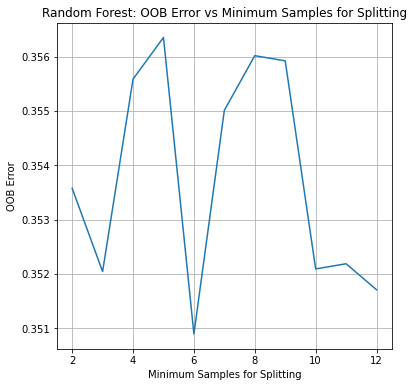

In [25]:
# build array of min_samples_split values from 2-12
min_samples = np.linspace(2, 12, 11).astype(int)

# create random forest model
RF_clf = RandomForestClassifier(random_state=10, oob_score=True, max_depth=12)

# initialize empty list to contain OOB error value for each number of trees tested
oob = []

# iterate over number of trees to get OOB error
for i in min_samples:
    RF_clf.set_params(min_samples_split=i)
    RF_clf.fit(x_train, y_train)
    oob.append(1-RF_clf.oob_score_)

# Plot cross validation scores on y-axis with lambda on x-axis
plt.rcParams["figure.figsize"] = (6,6)
plt.plot(min_samples, oob)
 
# generate plot
plt.xlabel("Minimum Samples for Splitting")
plt.ylabel("OOB Error")
plt.grid()
plt.title("Random Forest: OOB Error vs Minimum Samples for Splitting")
plt.show()

    As can be seen above, the OOB error is minimized for a max_depth value of 12, and min_samples_split value of 5.  So, we will rerun our random forest model using these hyperparameter values.

In [26]:
# create neural net classifier and get prediction for test set
RF_clf = RandomForestClassifier(random_state=10, oob_score=True, n_estimators=800, max_depth=12, 
                                min_samples_split=6).fit(x_train, y_train)
RF_pred = RF_clf.predict(x_test)

# create Pandas df containing the actual labels in the test set, and all of the predictions
df_pred = pd.DataFrame(list(zip(y_test, RF_pred)), 
                 columns=['Actual_Label', 'RF_Pred'])

# create 'Match' columns populated with a 1 for correct prediction and 0 for incorrect prediction
df_pred['RF_Match'] = np.where(df_pred['RF_Pred'] == df_pred['Actual_Label'], 1, 0)

# calculate misclassification rate for each algorithm
n = len(df_pred)
misrateRF = 1 - df_pred['RF_Match'].value_counts()[1] / n
print(f'Random Forest misclassification rate on test set: {misrateRF}')

Random Forest misclassification rate on test set: 0.3522313733001341


    Our two best performing models were neural network and random forest.  Now, let's get some more detailed metrics for each model.

In [27]:
# get detailed metrics for neural network and random forest models

print("\n***Random Forest Metrics***\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, RF_pred))
pscore = precision_score(y_test, RF_pred, average='macro')
print(f'Precision Score: {pscore}')
rscore = recall_score(y_test, RF_pred, average='macro')
print(f'Recall Score: {rscore}')
f1score = f1_score(y_test, RF_pred, average='macro')
print(f'F-1 Score: {f1score}')

print("\n***Neural Network Metrics***\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, NN_pred))
pscore = precision_score(y_test, NN_pred, average='macro')
print(f'Precision Score: {pscore}')
rscore = recall_score(y_test, NN_pred, average='macro')
print(f'Recall Score: {rscore}')
f1score = f1_score(y_test, NN_pred, average='macro')
print(f'F-1 Score: {f1score}')


***Random Forest Metrics***

Confusion Matrix:
[[188   2   8   0  69   8  15   0  18 111]
 [ 16 511  36  26  17  19   0  11   0   0]
 [ 24  48 305   2  52  26   1  45   0   8]
 [  0  15   3 409   1   0   0  21   0   0]
 [ 23   4   7   0 330   1   0  12   2 114]
 [ 31  23  36   0  11 379   3  29   2   8]
 [  4   0   1   0   3   1 261   0 336  31]
 [  7   6  64  29  29  61   0 362   2  11]
 [ 11   0   0   0   5   0 219   0 244  47]
 [ 23   0   3   0  21   1   8   2   6 393]]
Precision Score: 0.6537328222211161
Recall Score: 0.6522896500735501
F-1 Score: 0.646946207932176

***Neural Network Metrics***

Confusion Matrix:
[[181   3   3   0  79  14  25   1  16  97]
 [ 12 523  31  24  19  18   0   9   0   0]
 [ 22  67 288   1  62  24   0  39   0   8]
 [  0  15   5 408   0   0   0  21   0   0]
 [ 26   2  25   0 325   8   1  13   3  90]
 [ 21  42  24   0  17 354  13  39   5   7]
 [ 16   0   0   0   5   6 353   0 223  34]
 [  8  10  61  28  28  64   1 359   0  12]
 [ 18   0   0   0   9   1 221 

    The final F1 scores for the random forest and neural network models can be found above.  The random forest model performed slightly better, with an F1 score of 64.7%.  The neural network model had an F1 score of 64.4%.